The following notebook is the code used in the short paper *Satellite parking: a new method for measuring parking occupancy* by Renato Stopic, Eduardo Dias, Maurice de Kleijn and Eric Koomen. The code is made to run on the data available here: https://doi.org/10.34894/6XDN8I. The final paper is available here: *insert link when available*

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from skimage.filters import threshold_otsu
from skimage.filters import threshold_li
from skimage.filters import threshold_minimum
from skimage.filters import threshold_triangle
from skimage.filters import threshold_isodata
from skimage.filters import threshold_yen
from skimage.filters import threshold_mean
import matplotlib.pyplot as plt

In [2]:
#loading the parking spots from the gpgk file and removing the geometry layer
gdf = gpd.read_file('parking_spots.gpkg')
df = gdf.drop(gdf.columns[-1], axis = 1)
data = df.to_numpy()

In [3]:
#optional, removing all the values where the NDVI max is above 0.5
data = np.delete(data, np.where(data[:,14] > 0.5), axis=0)

In [8]:
#loading in the range of the green band to apply thresholding-
#please check gdf for what column represents what value 
input_data = data[:,5]

In [9]:
#applying the thresholding algorithm
#triangle thresholding is selected since it had the best result
#other thresholding algorithms can be select from Cell 1
thresh_triangle = threshold_triangle(input_data)
print(thresh_triangle)

620.796875


Text(0, 0.5, 'Count')

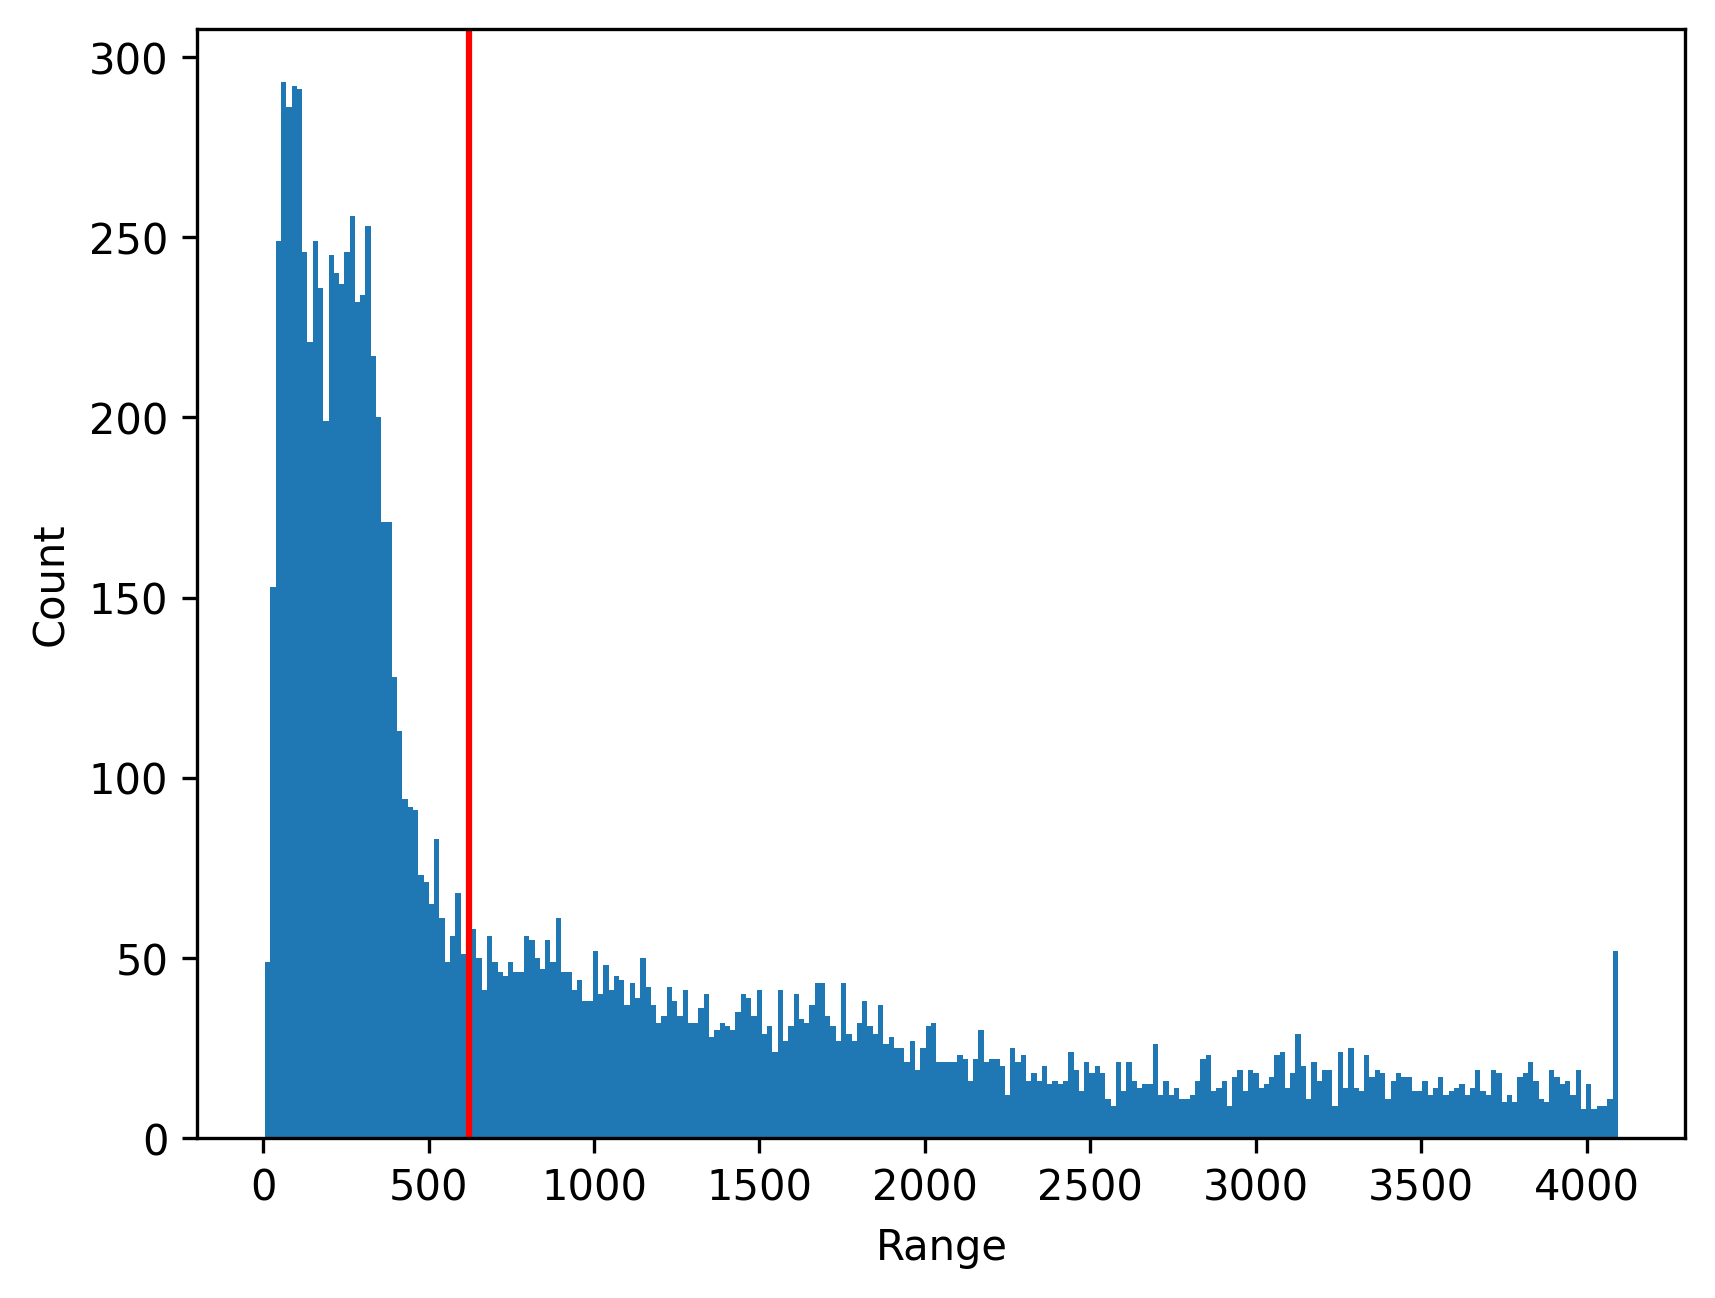

In [10]:
#plotting the graph with triangle thresholding
#change second line if you want to select another thresholding algorithm
plt.rcParams['figure.dpi'] = 300
plt.hist(image, 256)
plt.axvline(thresh_triangle, color='r')
plt.xlabel('Range')
plt.ylabel('Count')